# Analysis and Hypothesis Testing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency

In [2]:
#Load the cleaned dataset
cat_survey_results = pd.read_csv('cleaned_cat_survey_results.csv')

In [3]:
# Descriptive statistics
descriptive_stats = cat_survey_results.describe()

In [4]:
# Correlation analysis
correlation_sleep_quality_grooming = cat_survey_results['Sleep Quality (1-10)'].corr(cat_survey_results['Grooming Frequency (times/week)'])
correlation_sleep_quality_activity = cat_survey_results['Sleep Quality (1-10)'].corr(cat_survey_results['Activity Duration (min)'])


In [5]:
# T-test: Sleep Quality vs. Feeding Schedule
routine_feeding_sleep_quality = cat_survey_results[cat_survey_results['Feeding Schedule'] == 'Routine Feeding']['Sleep Quality (1-10)']
free_feeding_sleep_quality = cat_survey_results[cat_survey_results['Feeding Schedule'] == 'Free Feeding']['Sleep Quality (1-10)']
t_stat, p_val = ttest_ind(routine_feeding_sleep_quality, free_feeding_sleep_quality)


In [6]:
# Chi-Square Test: Grooming vs. Sleep Quality
contingency_table_grooming_sleep_quality = pd.crosstab(cat_survey_results['Grooming'], cat_survey_results['Sleep Quality (1-10)'])
chi2_stat_grooming_sleep_quality, p_val_grooming_sleep_quality, dof_grooming_sleep_quality, expected_grooming_sleep_quality = chi2_contingency(contingency_table_grooming_sleep_quality)


In [7]:
# Chi-Square Test: Feeding Schedule vs. Zoomies
contingency_table_feeding_zoomies = pd.crosstab(cat_survey_results['Feeding Schedule'], cat_survey_results['Zoomies'])
chi2_stat_feeding_zoomies, p_val_feeding_zoomies, dof_feeding_zoomies, expected_feeding_zoomies = chi2_contingency(contingency_table_feeding_zoomies)


In [8]:
# Save results
results = {
    'Descriptive Statistics': descriptive_stats,
    'Correlation Sleep Quality and Grooming Frequency': correlation_sleep_quality_grooming,
    'Correlation Sleep Quality and Activity Duration': correlation_sleep_quality_activity,
    'T-Test Sleep Quality vs. Feeding Schedule': {'t_stat': t_stat, 'p_val': p_val},
    'Chi-Square Test Grooming vs. Sleep Quality': {'chi2_stat': chi2_stat_grooming_sleep_quality, 'p_val': p_val_grooming_sleep_quality},
    'Chi-Square Test Feeding Schedule vs. Zoomies': {'chi2_stat': chi2_stat_feeding_zoomies, 'p_val': p_val_feeding_zoomies}
}

# Print results
for key, value in results.items():
    print(f"{key}: {value}")

Descriptive Statistics:           Cat Age  Activity Duration (min)  Portion Size (grams)  \
count  100.000000                100.00000            100.000000   
mean     9.640000                 65.58000            124.510000   
std      5.296311                 32.32386             42.365293   
min      1.000000                 10.00000             50.000000   
25%      5.000000                 40.25000             91.000000   
50%      9.000000                 66.50000            128.500000   
75%     14.000000                 98.25000            156.000000   
max     19.000000                119.00000            198.000000   

       Feeding Frequency (times/day)  Current Weight (kg)  \
count                     100.000000           100.000000   
mean                        1.970000             6.065800   
std                         0.809726             1.675662   
min                         1.000000             2.570000   
25%                         1.000000             4.840000 

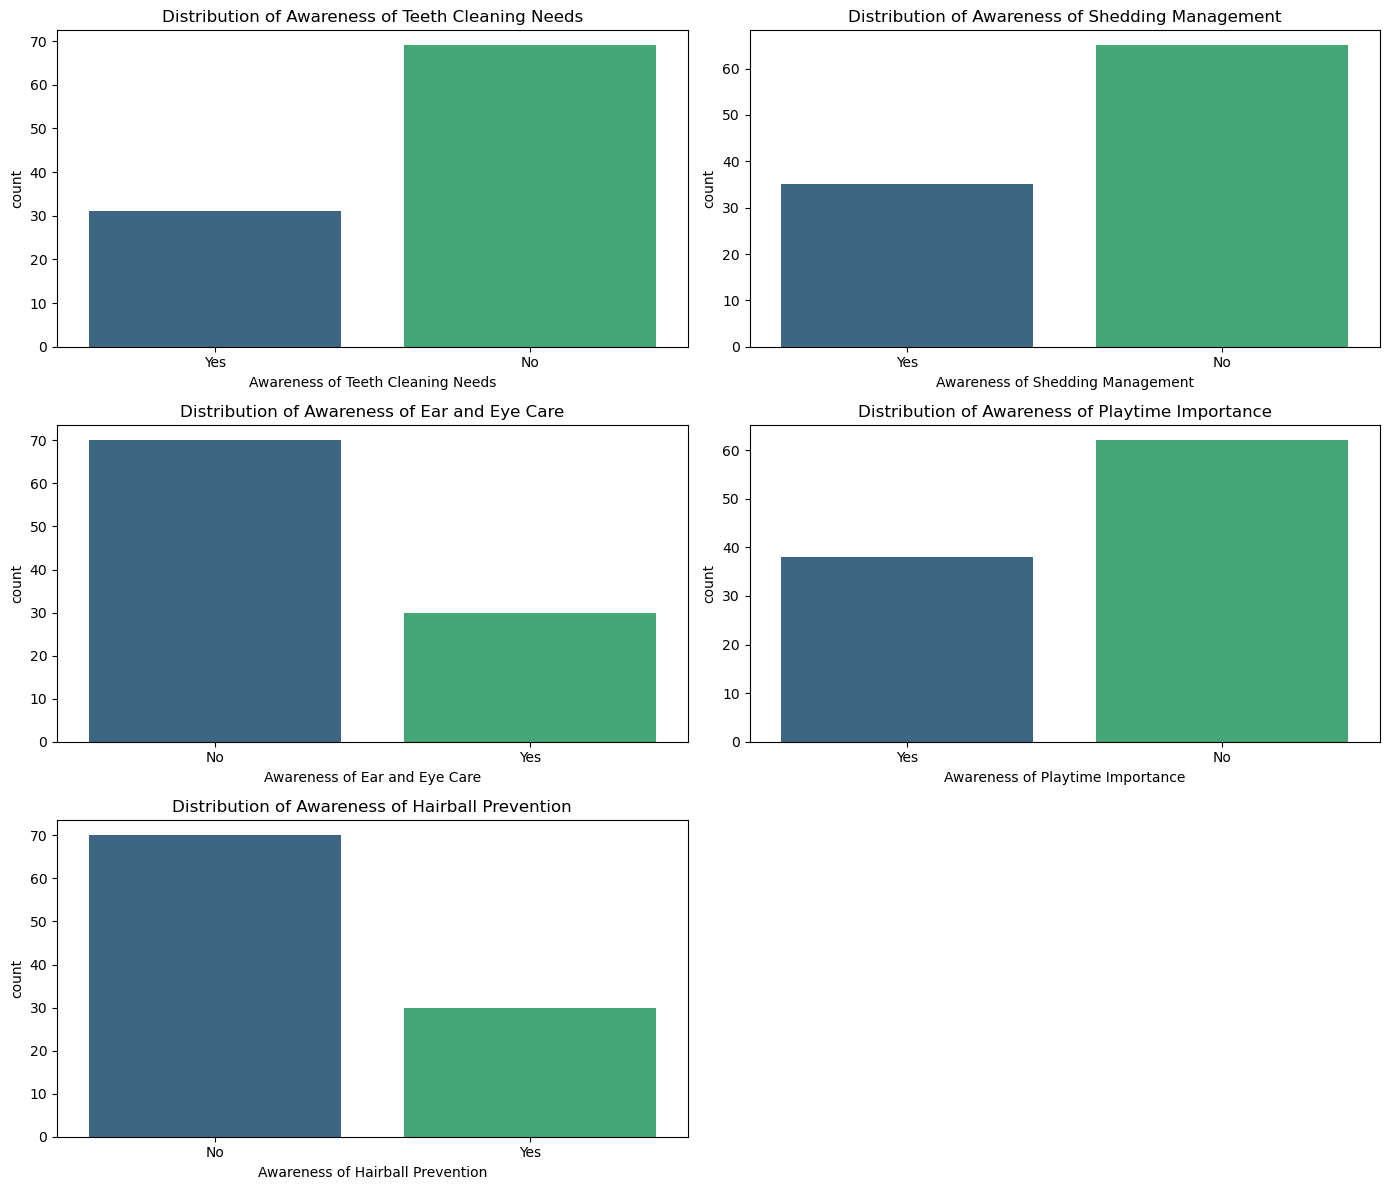

In [82]:
# Plotting distributions of awareness
awareness_columns = [
    'Awareness of Teeth Cleaning Needs',
    'Awareness of Shedding Management',
    'Awareness of Ear and Eye Care',
    'Awareness of Playtime Importance',
    'Awareness of Hairball Prevention'
]

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.flatten()

for i, col in enumerate(awareness_columns):
    sns.countplot(x=col, data=cat_survey_results, hue=col, ax=axes[i], palette='viridis', legend=False)
    axes[i].set_title(f'Distribution of {col}')
    legend = axes[i].get_legend()
    if legend:
        legend.remove()

# Remove the last empty subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

In [83]:
# to Tableau for more plotting

In [73]:
# Melt the data to long format
awareness_columns = [
    'Awareness of Teeth Cleaning Needs', 
    'Awareness of Shedding Management', 
    'Awareness of Ear and Eye Care', 
    'Awareness of Playtime Importance', 
    'Awareness of Hairball Prevention'
]

melted_data = cat_survey_results.melt(
    id_vars=[col for col in cat_survey_results.columns if col not in awareness_columns],
    value_vars=awareness_columns,
    var_name='Awareness Category',
    value_name='Response'
)

# Save the reshaped data
melted_data.to_csv('reshaped_data.csv', index=False)